# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [4]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(['type']).count()['ride_id']
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(['type']).sum()['driver_count']
driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
fare_sum = pyber_data_df.groupby(['type']).sum()['fare']
fare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
Average_fare_per_ride = pyber_data_df.groupby(['type']).sum()['fare']/ride_count
Average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
Average_fare_per_driver = pyber_data_df.groupby(['type']).sum()['fare']/driver_count
Average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    'Total Rides': ride_count,
    'Total Drivers': driver_count,
    'Total Fares': fare_sum,
    'Average Fare per Ride': Average_fare_per_ride,
    'Average Fare per Driver':Average_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [13]:
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [14]:
#  8. Format the columns.
pd.options.display.float_format = '${:.2f}'.format
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [16]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sum_by_date_df = pyber_data_df.groupby(['date','type']).sum(['fare'])
fare_sum_by_date_df

,,fare,ride_id,driver_count
date,type,,,
2019-01-01 00:08:16,Urban,$37.91,5673666505216,69
2019-01-01 00:46:46,Suburban,$47.74,2215912677020,23
2019-01-01 02:07:24,Suburban,$24.07,7827431948090,10
2019-01-01 03:46:50,Urban,$7.57,5815378003370,64
2019-01-01 05:23:21,Urban,$10.75,6571513080673,28
...,...,...,...,...
2019-05-08 04:20:00,Urban,$21.99,117997692054,52
2019-05-08 04:39:49,Urban,$18.45,1811574736337,11
2019-05-08 07:29:01,Urban,$18.55,5682021476085,33


In [17]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_sum_by_date_df = fare_sum_by_date_df.reset_index()


In [18]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = fare_sum_by_date_df.pivot(index= 'date', columns= 'type', )[['fare']]
pyber_pivot

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN $37.91
2019-01-01 00:46:46   NaN   $47.74    NaN
2019-01-01 02:07:24   NaN   $24.07    NaN
2019-01-01 03:46:50   NaN      NaN  $7.57
2019-01-01 05:23:21   NaN      NaN $10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN $21.99
2019-05-08 04:39:49   NaN      NaN $18.45
2019-05-08 07:29:01   NaN      NaN $18.55
2019-05-08 11:38:35   NaN      NaN $19.77
2019-05-08 13:10:18   NaN      NaN $18.04

[2375 rows x 3 columns]

In [19]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.


Jan_Apr = pyber_pivot.loc['2019-01-01':'2019-04-29'] 
Jan_Apr

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN $37.91
2019-01-01 00:46:46   NaN   $47.74    NaN
2019-01-01 02:07:24   NaN   $24.07    NaN
2019-01-01 03:46:50   NaN      NaN  $7.57
2019-01-01 05:23:21   NaN      NaN $10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN $11.46
2019-04-28 16:29:16   NaN      NaN $36.42
2019-04-28 17:26:52   NaN      NaN $31.43
2019-04-28 17:38:09   NaN   $34.87    NaN
2019-04-28 19:35:03   NaN   $16.96    NaN

[2196 rows x 3 columns]

In [20]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
Jan_Apr.index = pd.to_datetime(Jan_Apr.index)

In [21]:
# 7. Check that the datatype for the index is datetime using df.info()
Jan_Apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Jan_Apr_by_week = Jan_Apr.resample("w").sum()
Jan_Apr_by_week.index.name = None
Jan_Apr_by_week.columns.name = None
Jan_Apr_by_week


fare                  
type         Rural Suburban    Urban
2019-01-06 $187.92  $721.60 $1661.68
2019-01-13  $67.65 $1105.13 $2050.43
2019-01-20 $306.00 $1218.20 $1939.02
2019-01-27 $179.69 $1203.28 $2129.51
2019-02-03 $333.08 $1042.79 $2086.94
2019-02-10 $115.80  $974.34 $2162.64
2019-02-17  $95.82 $1045.50 $2235.07
2019-02-24 $419.06 $1412.74 $2466.29
2019-03-03 $175.14  $858.46 $2218.20
2019-03-10 $303.94  $925.27 $2470.93
2019-03-17 $163.39  $906.20 $2044.42
2019-03-24 $189.76 $1122.20 $2368.37
2019-03-31 $199.42 $1045.06 $1942.77
2019-04-07 $501.24 $1010.73 $2356.70
2019-04-14 $269.79  $784.82 $2390.72
2019-04-21 $214.14 $1149.27 $2303.80
2019-04-28 $191.85 $1357.75 $2238.29

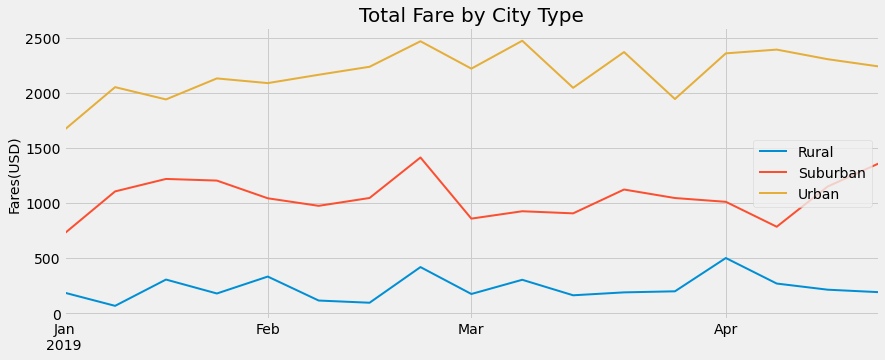

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create the plot with ax.plt()
ax = Jan_Apr_by_week.plot(figsize=(13,5), linewidth=(2), label= 'City Type')

#add a legend
ax.legend(['Rural','Suburban','Urban'])

#create title
ax.set_title('Total Fare by City Type',fontsize=20)

#Create labels for the x and y axes
ax.set_ylabel('Fares(USD)',fontsize=14)


# Save the figure.
plt.savefig('analysis/PyBer_fare_summary.png')
